# This propblem has been solved using 3 algorythms, DBSCAN,Hierarchical clustering and kmean clustering

In [73]:
#import hierarchycal clustering libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch # to draw dendrogram
from sklearn.cluster import AgglomerativeClustering # for model building using Hierarchical Clustering
from sklearn.cluster import KMeans # for model nuilding using kmeans clustering
from sklearn.cluster import DBSCAN

In [74]:
data = pd.read_csv("crime_data.csv")
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [75]:
df = data.rename(columns = {"Unnamed: 0": "Places"})
df.head()

,Places,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# EDA

In [76]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [77]:
df.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Places    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [78]:
df.shape

(50, 5)

# Standardisation of dataset

In [79]:
#Normalisation function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return(x)

#we can use score standardisation too

In [80]:
df.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [81]:
df_norm = norm_func(df.iloc[:,1:])
df_norm
#applied norm function on numerical column of dataframe

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# Hierarchical  Clustering

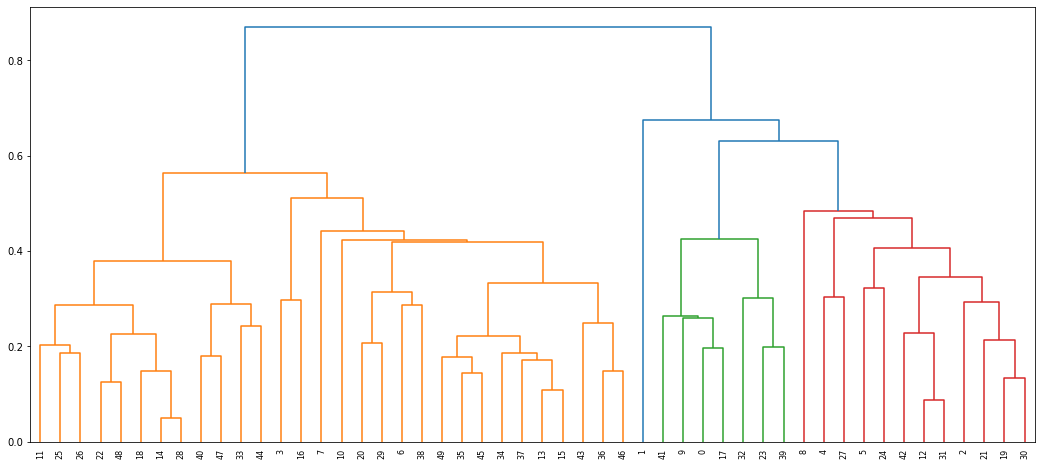

In [82]:
#create dendogram
plt.figure(figsize = (18,8))
dendogram = sch.dendrogram(sch.linkage(df_norm, method = 'average'))

In [83]:
#create clusters
hc = AgglomerativeClustering(n_clusters = 5,
                            affinity = 'euclidean',
                            linkage = 'average')

In [84]:
y_hc = hc.fit_predict(df_norm)
y_hc
#save cluster for chart

array([3, 2, 1, 0, 1, 1, 0, 0, 1, 3, 0, 4, 1, 0, 4, 0, 0, 3, 4, 1, 0, 1,
       4, 3, 1, 4, 4, 1, 4, 0, 1, 1, 3, 4, 0, 0, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 0, 0, 4, 4, 0], dtype=int64)

In [85]:
Clusters = pd.DataFrame(y_hc,columns = ['Clusters'])
Clusters

,Clusters
0,3
1,2
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,3


In [86]:
df_norm['h_clusterid'] = Clusters

In [87]:
df_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,3
1,0.554217,0.746575,0.271186,0.961240,2
2,0.439759,0.852740,0.813559,0.612403,1
3,0.481928,0.496575,0.305085,0.315245,0
4,0.493976,0.791096,1.000000,0.860465,1
5,0.427711,0.544521,0.779661,0.811370,1
6,0.150602,0.222603,0.762712,0.098191,0
7,0.307229,0.660959,0.677966,0.219638,0
8,0.879518,0.993151,0.813559,0.635659,1
9,1.000000,0.568493,0.474576,0.478036,3


In [88]:
df_norm.sort_values("h_clusterid")

,Murder,Assault,UrbanPop,Rape,h_clusterid
49,0.361446,0.397260,0.474576,0.214470,0
29,0.397590,0.390411,0.966102,0.297158,0
16,0.536145,0.219178,0.338983,0.232558,0
15,0.313253,0.239726,0.576271,0.276486,0
34,0.391566,0.256849,0.728814,0.364341,0
13,0.385542,0.232877,0.559322,0.354005,0
35,0.349398,0.363014,0.610169,0.328165,0
36,0.246988,0.390411,0.593220,0.568475,0
20,0.216867,0.356164,0.898305,0.232558,0
10,0.271084,0.003425,0.864407,0.333333,0


In [89]:
df["h_clusterid"] = Clusters
df.sort_values("h_clusterid")

,Places,Murder,Assault,UrbanPop,Rape,h_clusterid
49,Wyoming,6.8,161,60,15.6,0
29,New Jersey,7.4,159,89,18.8,0
16,Kentucky,9.7,109,52,16.3,0
15,Kansas,6.0,115,66,18.0,0
34,Ohio,7.3,120,75,21.4,0
13,Indiana,7.2,113,65,21.0,0
35,Oklahoma,6.6,151,68,20.0,0
36,Oregon,4.9,159,67,29.3,0
20,Massachusetts,4.4,149,85,16.3,0
10,Hawaii,5.3,46,83,20.2,0


In [90]:
df.groupby('h_clusterid').mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,6.055556,140.055556,71.333333,18.683333
1,10.883333,256.916667,78.333333,32.250000
2,10.000000,263.000000,48.000000,44.500000
3,14.671429,251.285714,54.285714,21.685714
4,3.091667,76.000000,52.083333,11.833333


In [91]:
df['h_clusterid'].value_counts()

0    18
1    12
4    12
3     7
2     1
Name: h_clusterid, dtype: int64

# Using K Means Clustering

In [92]:
#lets not create another dataframe by dropping h_clusterid column we will work on same normalised data frame

In [93]:
df_kmeans = df_norm.drop(columns = 'h_clusterid')
df_kmeans

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [94]:
kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans.fit(df_kmeans)

KMeans(n_clusters=5, random_state=0)

In [95]:
kmeans.inertia_

3.2250722560447906

In [96]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score
sil_score = []
wcss = []
cal_haz_score = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i ,random_state = 0)
    kmeans.fit(df_kmeans)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue
    sil_score.append(silhouette_score(df_kmeans,kmeans.labels_))
    cal_haz_score.append(calinski_harabasz_score(df_kmeans,kmeans.labels_))

C:\Users\sneha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [97]:
wcss

[13.184122550256445,
 6.596893867946198,
 5.010878493006418,
 3.683456153585913,
 3.2250722560447906,
 2.852039888521112,
 2.584866411431045,
 2.3142016897116373,
 2.1259292651810116,
 1.852827005187023]

In [98]:
sil_score
#this indicates that the clusters are overlapping as the silhouette score 
#is around zero but for first 4 clusters not overlapping little bit as the score is near 1 
#sil_score near to 1 mens its a good clustering

[0.4236445755962507,
 0.31877550799979315,
 0.3408903560074363,
 0.3062742525752849,
 0.2703558739205173,
 0.23711197479268137,
 0.2442234536910424,
 0.2318179462377368,
 0.2619627739735731]

In [99]:
cal_haz_score
# this score is higher means its a good thing we have good clustering

[47.929674643883594,
 38.330850690841054,
 39.548966697249526,
 34.74009476838373,
 31.879753081019327,
 29.386948325707873,
 28.182299517461505,
 26.658102653846377,
 27.180796368281808]

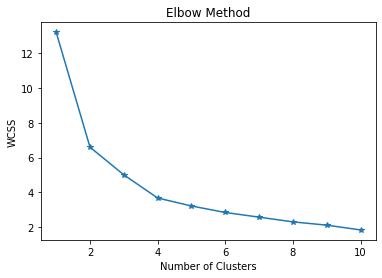

In [100]:
plt.plot(range(1,11),wcss,'*-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [101]:
#Selecting 5 number of cluster
k_clusterid = KMeans(n_clusters = 5,random_state=42)
k_clusterid.fit(df_kmeans)

KMeans(n_clusters=5, random_state=42)

In [102]:
k_clusterid.labels_

array([3, 1, 1, 2, 1, 1, 0, 0, 1, 3, 0, 4, 1, 2, 4, 2, 2, 3, 4, 1, 0, 1,
       4, 3, 0, 2, 2, 1, 4, 0, 1, 1, 3, 4, 0, 0, 0, 0, 0, 3, 4, 3, 1, 0,
       4, 2, 0, 4, 4, 2])

In [103]:
#Assign Cluster to dataset
df['k_clusterid'] = k_clusterid.labels_
df

,Places,Murder,Assault,UrbanPop,Rape,h_clusterid,k_clusterid
0,Alabama,13.2,236,58,21.2,3,3
1,Alaska,10.0,263,48,44.5,2,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,0,2
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,0,0
7,Delaware,5.9,238,72,15.8,0,0
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,3,3


In [104]:
df.groupby('k_clusterid').mean()

,Murder,Assault,UrbanPop,Rape,h_clusterid
k_clusterid,,,,,
0,5.461538,142.692308,76.769231,19.492308,0.076923
1,10.966667,264.000000,76.500000,33.608333,1.083333
2,7.162500,131.875000,58.875000,18.000000,1.000000
3,14.671429,251.285714,54.285714,21.685714,3.000000
4,2.680000,70.100000,51.000000,10.910000,4.000000


In [105]:
df['k_clusterid'].value_counts()

0    13
1    12
4    10
2     8
3     7
Name: k_clusterid, dtype: int64

# Using DBSCAN

In [106]:
df.boxplot(
#there are outliers in rape columns

SyntaxError: unexpected EOF while parsing (2555352051.py, line 2)

In [ ]:
df_DB = df_norm.drop(columns = 'h_clusterid')
df_DB

In [ ]:
my_array = df_norm.values
my_array

In [ ]:
#if i increase the value of eps then many points will be kept in the sam cluster and if i decrese the value of eps then many
#noise point will be created. they are hyperparameters
dbscan = DBSCAN(eps = 0.4, min_samples = 3)
dbscan.fit(my_array)

In [ ]:
#Noisy samples are given the label -1.
dbscan.labels_

In [ ]:
#Assign Cluster to dataset
df['D_clusterid'] = dbscan.labels_
df

In [ ]:
df[df['D_clusterid'] == -1]
#this is noise point

# both hierarchical and kmeans alloted each observations in clusters. while DBSCAN detected 1 noise in the dataset. 

# I find DBSCAN Algorithm good.as it is capable of capturing noise. because it works on density basis not on distance basis.so that it treated as separete cluster.